In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [2]:
g1_flow_av = np.zeros(10794) # 10794 = number of frames in movie 1

# Compute average flow per frame
for i in range(10794):
    flow_mag = np.load("G1Flow/flow_f" + str(i) + ".npy", allow_pickle=True)
    flow_mag = flow_mag.astype('float64')
    flow_mag[flow_mag == np.inf] = 0 # Set overflowed values to 0
    g1_flow_av[i] = np.mean(flow_mag)

In [15]:
g2_flow_av = np.zeros(10798) # 10798 = number of frames in movie 2

# Compute average flow per frame
for i in range(10798):
    flow_mag = np.load("G2Flow/flow_f" + str(i) + ".npy", allow_pickle=True)
    flow_mag = flow_mag.astype('float64')
    flow_mag[flow_mag == np.inf] = 0 # Set overflowed values to 0
    g2_flow_av[i] = np.mean(flow_mag)

# Interpolating Flow To ECoG Sampling Frequency (512 Hz)

In [18]:
grav1_audio_len = 230536
grav1_video_len = 10794
freq_ratio_1 = grav1_audio_len / grav1_video_len

In [19]:
freq_ratio_1

21.357791365573465

In [20]:
grav2_audio_len = 230622
grav2_video_len = 10798
freq_ratio_2 = grav2_audio_len / grav2_video_len

In [21]:
freq_ratio_2

21.357844045193556

In [22]:
interp_coord_g1 = np.arange(0, len(g1_flow_av), 1 / freq_ratio_1)
interp_coord_g2 = np.arange(0, len(g2_flow_av), 1 / freq_ratio_2)

In [23]:
x_coord_g1 = np.arange(len(g1_flow_av))
x_coord_g2 = np.arange(len(g2_flow_av))

In [24]:
flow_g1 = np.interp(interp_coord_g1, x_coord_g1, g1_flow_av)
flow_g2 = np.interp(interp_coord_g2, x_coord_g2, g2_flow_av)

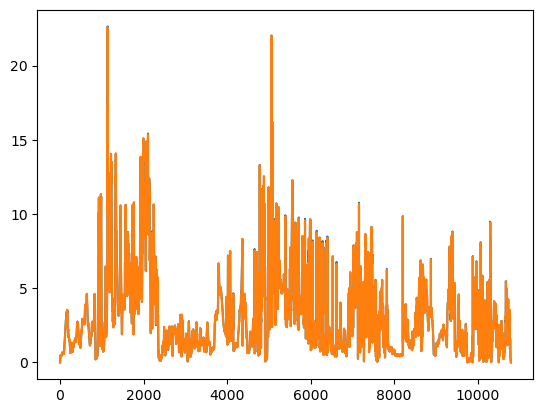

In [27]:
plt.plot(x_coord_g1, g1_flow_av)
plt.plot(interp_coord_g1, flow_g1)

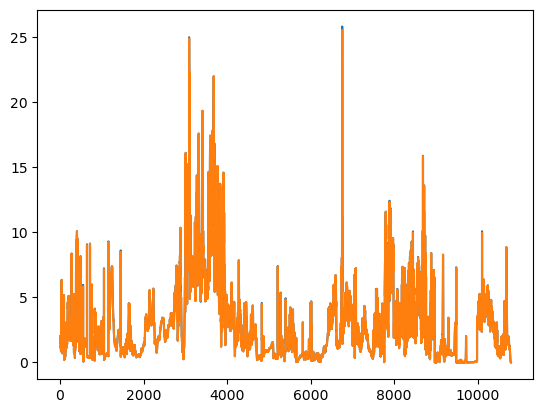

In [28]:
plt.plot(x_coord_g2, g2_flow_av)
plt.plot(interp_coord_g2, flow_g2)

In [29]:
np.save("flow_g1.npy", flow_g1)
np.save("flow_g2.npy", flow_g2)

# Tie-Ranking Flow

In [2]:
flow_g1 = np.load("flow_g1.npy", allow_pickle = True)
flow_g2 = np.load("flow_g2.npy", allow_pickle = True)

tie_ranked_f1 = rankdata(flow_g1)
tie_ranked_f2 = rankdata(flow_g2)

In [ ]:
np.save("tr_flow_g1.npy", tie_ranked_f1)
np.save("tr_flow_g2.npy", tie_ranked_f2)

# Tie-Ranking Shuffled  Flow

In [14]:
shuf_flow_g1 = np.load("shuffled_flow_g1.npy", allow_pickle = True)
shuf_flow_g2 = np.load("shuffled_flow_g2.npy", allow_pickle = True)

In [17]:
tr_shuf_flow_g1 = rankdata(shuf_flow_g1, axis=1)
tr_shuf_flow_g2 = rankdata(shuf_flow_g2, axis=1)

In [18]:
np.save("tr_shuffled_flow_g1.npy", tr_shuf_flow_g1)
np.save("tr_shuffled_flow_g2.npy", tr_shuf_flow_g2)